In [1]:
from fastai.vision.all import *

In [2]:
! tree -d ../input/flowers-recognition

../input/flowers-recognition
└── flowers
    ├── daisy
    ├── dandelion
    ├── flowers
    │   ├── daisy
    │   ├── dandelion
    │   ├── rose
    │   ├── sunflower
    │   └── tulip
    ├── rose
    ├── sunflower
    └── tulip

12 directories


In [3]:
imageDatablock = DataBlock(
                    blocks=(ImageBlock, CategoryBlock),
                    get_items=get_image_files,
                    get_y=parent_label,
                    splitter=RandomSplitter(valid_pct=0.15, seed=34),
                    item_tfms=Resize(460),
                    batch_tfms=aug_transforms(size=224)
                )

In [4]:
data_path = Path('../input/flowers-recognition')

In [5]:
dls = imageDatablock.dataloaders(data_path)

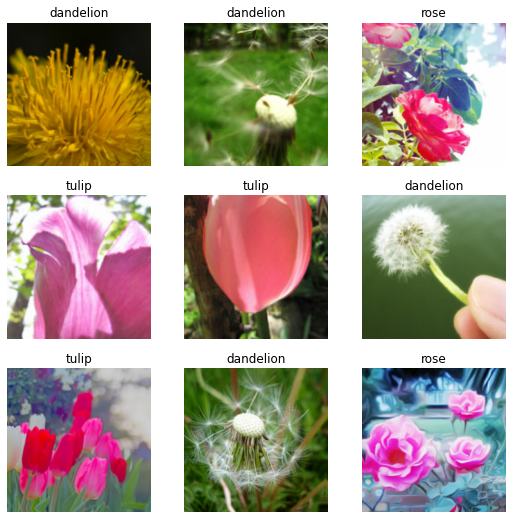

In [6]:
dls.show_batch()

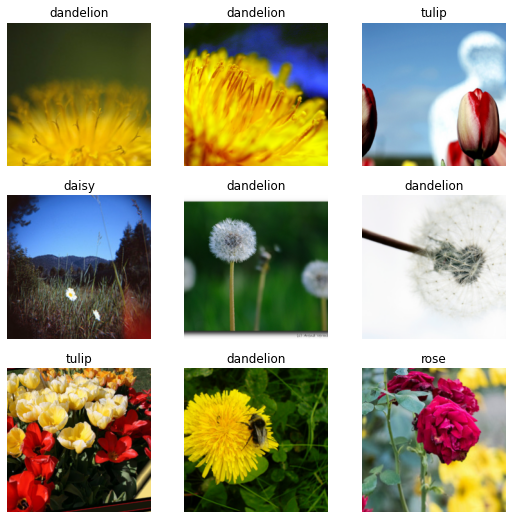

In [7]:
dls.train.show_batch()

In [8]:
learn = cnn_learner(dls, resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

SuggestedLRs(lr_min=0.010000000149011612, lr_steep=0.0003311311302240938)

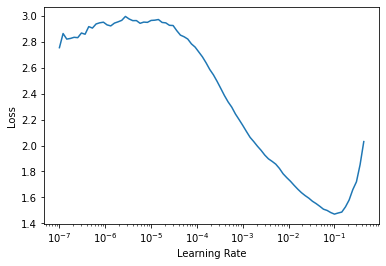

In [9]:
learn.lr_find()

In [10]:
learn.fine_tune(3, 3e-4)

epoch,train_loss,valid_loss,error_rate,time
0,0.769906,0.277153,0.091049,01:14


epoch,train_loss,valid_loss,error_rate,time
0,0.374206,0.160628,0.054012,01:11
1,0.258265,0.113285,0.035494,01:12
2,0.180332,0.094881,0.032407,01:12


In [11]:
learn.export()

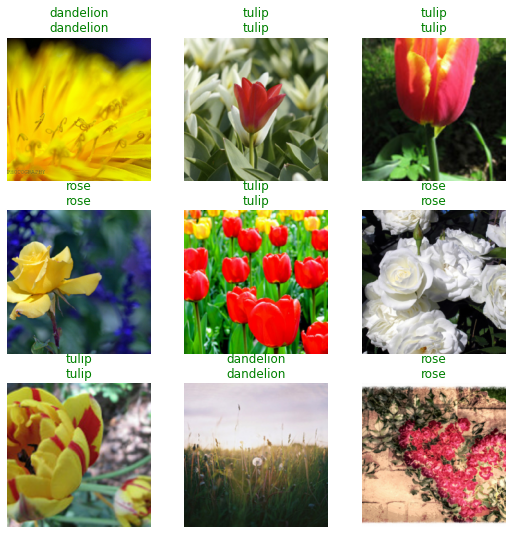

In [12]:
learn.show_results()

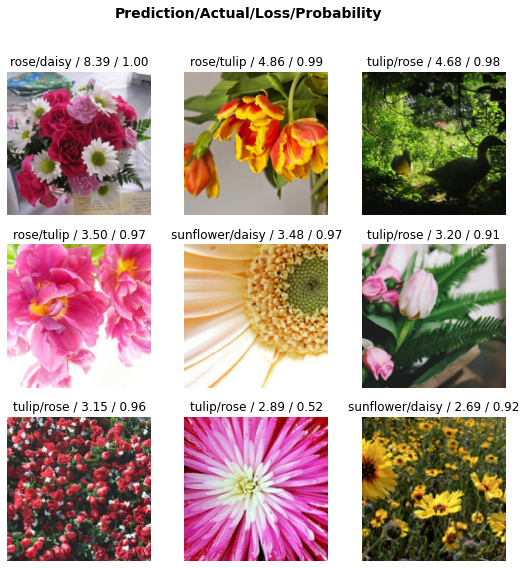

In [13]:
interp = Interpretation.from_learner(learn)
interp.plot_top_losses(9)

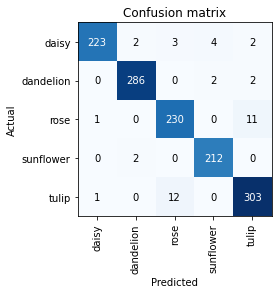

In [14]:
interep = ClassificationInterpretation.from_learner(learn)
interep.plot_confusion_matrix()